[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


## 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* **전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.**
* **시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.**
* 또 **정규표현식**을 활용해서 **텍스트 데이터 전처리와 데이터 마스킹 기법**에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 **전국 도시공원에 대한 분포를 시각화**해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

### 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


#### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)
- 기술통계값을 리포트 형태로 표현해 준다.
* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

#### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


### 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

<AxesSubplot:title={'center':'한글폰트'}>

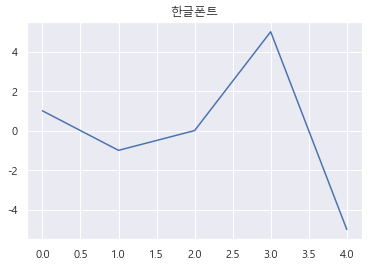

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"

plt.rc("font", family="Malgun Gothic")

sns.set(font="Malgun Gothic",
      rc={"axes.unicode_minus":False},
      style="darkgrid")

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [3]:
# 그래프가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

### 데이터 로드

In [4]:
# 데이터를 로드해서 df 라는 변수에 담습니다.

df = pd.read_csv("data/전국도시공원표준데이터.csv", encoding="cp949")
df.shape

(18137, 20)

In [5]:
# 미리보기를 합니다.

df.head()

# 공원을 관리하고 있다면? 
# -> 내부 시설, 면적 비교 등을 해볼 수 있을 것.
# 도로명 주소에 지번주소 등으로 서로 결측치를 채울 수 있을 것. 

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


### Pandas Profiling
- Pandas를 통해서 기술통계 요약을 한꺼번에 보여주는 리포트를 생성해 준다.

- Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
- Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness ...

* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* conda : `conda install -c conda-forge pandas-profiling`
* pip : `pip install pandas-profiling`

- 변수가 20여개, 데이터의 수가 만 8천개 정도는 큰 숫자가 아니다.
<br>이보다 훨씬 많은 양의 데이터라면, 지난 수업과 같이
<br>필요한 데이터만 갖도록 축소시켜서 pandas profiling 이용할 것.

In [6]:
#import pandas as pd 
#print(pd.__version__)

!pip show pandas_profiling

Name: pandas-profiling
Version: 3.0.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: c:\users\soomin\anaconda3\lib\site-packages
Requires: matplotlib, htmlmin, scipy, visions, pandas, seaborn, missingno, joblib, tangled-up-in-unicode, jinja2, requests, PyYAML, phik, tqdm, numpy, pydantic
Required-by: 


In [12]:
# 버전에 따라 기능의 차이가 있습니다. 
# 이 강좌에서 사용하는 버전은 다음과 같습니다.

import pandas_profiling
# ProfileReport?

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [8]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.
from pandas_profiling import ProfileReport

# %time 으로 시간이 얼마나 걸리는지 측정
# %time profile = ProfileReport(df, title="도시공원 표준 데이터")

#profile = ProfileReport(df, title="도시공원 표준 데이터")
#profile.to_file(output_file="05-park_pandas_profile.html")

# 위에서 이미 폰트를 설정했더라도 pandas profiling 내부에서 폰트가 깨지는 걸 방지하기 위해 재설정이 필요합니다.
#import matplotlib 
#matplotlib.font_manager._rebuild()

# pandas profiling 에서 폰트가 깨진다면 아래코드의 주석을 풀고 폰트를 재설정 해보세요.
# 운영체제에 맞는 폰트를 설정해 주세요.
# Win
# plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
# 위 폰트 설정 방법으로 오류가 난다면 아래의 seaborn set을 통해 설정해 보세요.
# Win
#sns.set(font="Malgun Gothic")
# Mac
# sns.set(font="AppleGothic")



Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46020 missing from cur

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44221 missing from curr

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing 

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50896 missing from current font.
  font.se

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47749 missing 

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51452 missing from current font.
  font.se

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46041 missing from curre

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47536 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44540 missing from current font.
  font.se

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47732 missing from current font.
  font.se

C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\soomin\anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44396 missing from current font.
  font.se

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 기본 정보 보기

In [9]:
# info로 기본 정보를 봅니다.



In [10]:
# 결측치의 수를 구합니다.



In [11]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.

